
# Task 4: Classification using Logistic Regression

## Objective
To build a binary classification model using Logistic Regression.

## Tools Used
- Python
- Pandas
- Scikit-learn
- Matplotlib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

- Checking for missing values
- Separating features and target variable
- Standardizing numerical features


In [3]:
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.drop(["id", "Unnamed: 32"], axis=1)


In [6]:
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})



In [7]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


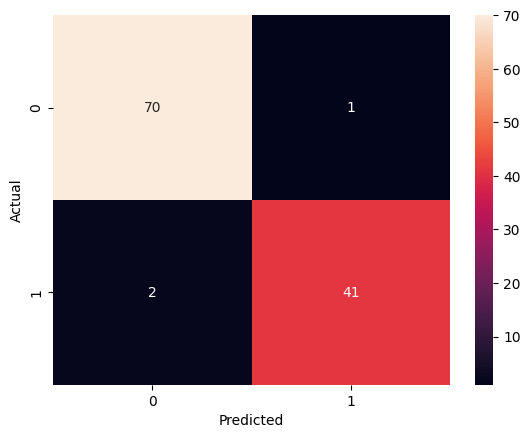

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



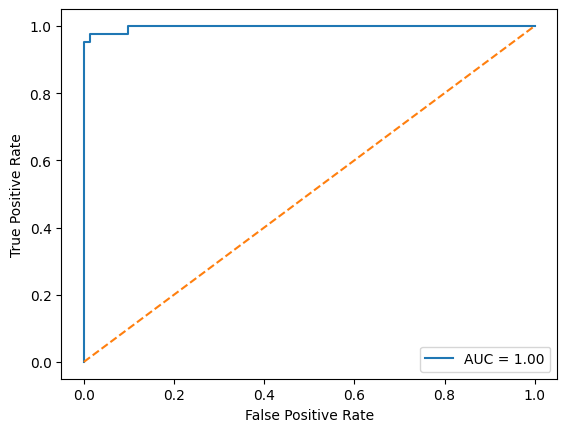

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## Model Evaluation

- Confusion Matrix shows true positives, false positives, true negatives, and false negatives.
- Precision measures how many predicted positives are actually positive.
- Recall measures how many actual positives were correctly identified.
- ROC-AUC measures the model’s ability to distinguish between classes.

Higher AUC indicates better classification performance.


## Sigmoid Function

Logistic Regression uses the sigmoid function to convert linear outputs into probabilities between 0 and 1.

Sigmoid formula:

σ(z) = 1 / (1 + e^(-z))

If probability > 0.5 → Class 1  
If probability < 0.5 → Class 0


Logistic Regression first calculates a linear combination of input features.
This value can range from -∞ to +∞.

The sigmoid function transforms this value into a probability between 0 and 1.

If probability > 0.5 → classified as 1  
If probability < 0.5 → classified as 0


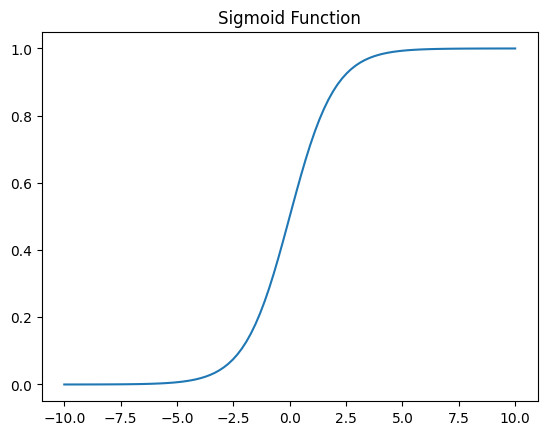

In [15]:
z = np.linspace(-10,10,100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.show()


In [16]:
new_pred = (y_prob > 0.3).astype(int)
print(confusion_matrix(y_test, new_pred))


[[67  4]
 [ 1 42]]


## Threshold Tuning

Default threshold is 0.5.

Changing the classification threshold affects precision and recall.

- Lower threshold → More positive predictions → Higher recall
- Higher threshold → Fewer positive predictions → Higher precision



## Final Conclusion

The Logistic Regression model successfully classified the dataset into two classes.

- Model performance was evaluated using confusion matrix, precision, recall, and ROC-AUC.
- ROC-AUC score indicates how well the model distinguishes between classes.
- Threshold tuning allows balancing between precision and recall.

Logistic Regression is effective for binary classification problems.
